<h1 style="text-align:center;padding:1px">한국 영화 데이터 분석</h1>
<h2 style="text-align:center;padding:2px">- 2011년 부터 2021년 4월 9일 개봉한 영화 중심으로 -</h2>

----

### 목차
* __서론__ 
 * **1. 주제 소개**
 * **2. 데이터 소개**
* __본론__
 * **1. 데이터 로드 및 설정**
     * 1) 모듈 설명
     * 2) 데이터 전처리
 * **2. 데이터 탐색**
     * 1) 전체 영화 구분에 따른 개봉작품수 
     * 2) 기간별 전체 영화 구분에 따른 개봉작품수 
     * 3) 전체 영화 등급 분포
         * 3 - 1) 전체 영화 장르 분포
         * 3 - 2) 전체 영화 장르와 등급의 매출액 상관관계
     * 4) 전체 영화 지역별 관객수 분포
         * 4 - 1) 전체 영화 지역별 상위 10개의 영화 비교 분석
     * 5) 가장 많은 영화를 개봉한 감독
         * 5 - 1) 스크린수가 1개인 영화 탐색
     * 6) 독립/예술 영화 추가 탐색 : 영화명 워드 클라우드 분석
 
* __결론__  
 * **1. 결과**
 * **2. 추후 개선 및 느낀점**
 * **3. 참고**

----

# 서론

## 1. 주제 소개

<img src ='https://postfiles.pstatic.net/MjAyMTA0MjBfMjY2/MDAxNjE4OTE2OTgwMTI3.-gONCwJ7vU1OHudwPJDTAg4VAGq8VzkdoENmuan2rXgg.yUD9Xtxp8FaJbsjNf63gPAphyRutRq0RP0KXXwa71x8g.JPEG.greatsol98/KakaoTalk_Photo_2021-04-18-19-56-22.jpeg?type=w966' width='300' >

### 배경
- 극장 뿐만 아니라 OTT 서비스에서도 독립/예술 영화 서비스 경쟁 진행 중
- 이는 지난 십년 동안 커져가는 한국에서도 독립 영화 시장이 커져갔고 이에 따라 ‘영화’ 라는 단어의 의미 확장이 진행되었다고 생각

### 개요 
- 전체적인 영화 산업에 대한 분석 진행 
- 추가적으로 일반영화와 독립/예술영화을기준으로 분류하여 비교 분석

## 2. 데이터 소개

<img src = 'https://postfiles.pstatic.net/MjAyMTA0MjBfMjcg/MDAxNjE4OTI1MzM1NDQ5.1ycZuuuOgnXxm3xfIgNEObKuHgBdWb_JYLYlTBz_HKMg.hFEzo5R39BQ37r6C5w8VLVGcHn8kMJgPhjHjodPtrQEg.PNG.greatsol98/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7_2021-04-18_%EC%98%A4%ED%9B%84_8.01.22.png?type=w966'>

- 2011년 1월 부터 2021년 4월 9일까지 개봉한 전체 영화 일람 데이터 

#### 출처 : 한국영화진흥위원회 박스오피스 https://www.kofic.or.kr/kofic/business/infm/introBoxOffice.do 

---- 

# 본론

## 1. 데이터 로드 및 설정

In [1]:
# warning 제거 
import warnings 
warnings.filterwarnings(action='ignore')

# 글꼴 설정 
from module.Font import Fontmanager
path = Fontmanager()

# module 
import pandas as pd
import missingno as msno
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import ImageColorGenerator
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.render import make_snapshot


from module.rate import rating
from module.BubbleChart import BubbleChart
from module.ColumnNanInfo import ColumnNanInfo
from module.DeleteVal import DeleteVal
from module.WordCount import WordCount

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [2]:
# 데이터 로드
df = pd.read_csv('./data/KoreaMovieData.csv', thousands = ',' )

### 1) 모듈 설명
- font.py : 한글 폰트 설정

<img src = 'https://postfiles.pstatic.net/MjAyMTA0MjBfMTQw/MDAxNjE4OTI2Mjc2MzU2.o1XlUHzGQ80n_QbhGAZq9RGNR0mMBOW88zEIM_juJmUg.nFzszpnwKuAwSWBo5R7o5Vq9c0KACdCn5lIq_Me7Xoog.PNG.greatsol98/font.png?type=w966'>

- rate.py : 영화 등급 분류

<img src ='https://postfiles.pstatic.net/MjAyMTA0MjBfNTcg/MDAxNjE4OTI2Mjc2NDk4.CPVi8k_VRC_K296mTCFMcKwAMhext4GEvAlRdU3htrYg.NwslRAo0A0qvIY95SXM2K8sStzjlSEgyOveNnJH2qwsg.PNG.greatsol98/rate.png?type=w966'>

- bubblechart.py : 버블 챠트

<img src = 'https://postfiles.pstatic.net/MjAyMTA0MjBfNjUg/MDAxNjE4OTI2Mjc2Mzc3.ZGIF4SUXw5lHtma3XOxpkYW4gS8arCXfd8bgig4HA3Ig.Fz3Lydf1uRWezlxuYYadKlGdhONLe2mbe7lUG7uSA4Yg.PNG.greatsol98/bubblechart.png?type=w966'>

- columnnaninfo.py : nan값 확인

<img src = 'https://postfiles.pstatic.net/MjAyMTA0MjBfMTYx/MDAxNjE4OTI2Mjc2MDI1.N0sQgXZxRqoylWi3iJM6mSVFL52cP0pqUfk6Y9mlgVcg.z3zXOU6gR2SiWCm7cDZ7sJ1F46G3UTvkgIj3JgR-ZFEg.PNG.greatsol98/columnnaninfo.png?type=w966'>

- deleteval.py : nan값 있는 열 제거 

<img src = 'https://postfiles.pstatic.net/MjAyMTA0MjBfNDIg/MDAxNjE4OTI2Mjc1ODg3.-2UPwMp3MP5TShHhFHVqbAGCpYTzTXfZDekMtoXqmPMg.QQg8to0-Nv2Ce8vaN5up72VcwjdBFlTqJA8HvCnMb3Ug.PNG.greatsol98/deleteval.png?type=w966'>

- wordcount.py : 가장 많이 사용된 20개의 단어 추출

<img src = 'https://postfiles.pstatic.net/MjAyMTA0MjBfNzMg/MDAxNjE4OTI2Mjc2MjEy.jWPEqqvz9mkC03BdX4e4MGq6EWhqJOeYXHYjK-cVWUcg.1drQ_DQny32hBPFGb4Xq0xQBbGmKKbQwXP0KyTHr13Eg.PNG.greatsol98/wordcount.png?type=w966'>

### 2) 데이터 전처리

In [3]:
# data column cleaning 
df.columns = df.columns.str.replace('\n','')

# index order by "순번"
df.set_index("순번", inplace = True)

In [4]:
# Filling missing value : "정보없음"
df = df.fillna("정보없음")

# 서울매출액만 정보 없음 값 0으로 대체
df["서울매출액"][df["서울매출액"] == "정보없음"] = 0 
df["서울매출액"] = df["서울매출액"].astype(int)

In [5]:
# 등급 변경 
raking_df = []
for i in df["등급"]:
    raking_df.append(rating(i))
    
df['등급'] = raking_df

In [6]:
# 일반 영화, 독립 영화 나눠주기 
indiefilm = df[df["영화구분"] == "독립/예술영화"]
film = df[df["영화구분"] == "일반영화"]

## 2. 데이터 탐색
### 1) 전체 영화 구분에 따른 개봉작품수 

> ### 독립 영화에 대한 현실적인 고민(부산일보_2020.09.28)
> - **독립 영화 배급사의 수는  서울에 약 5개, 부산에 약 2개 정도** 있는 것으로 알고 있다. 

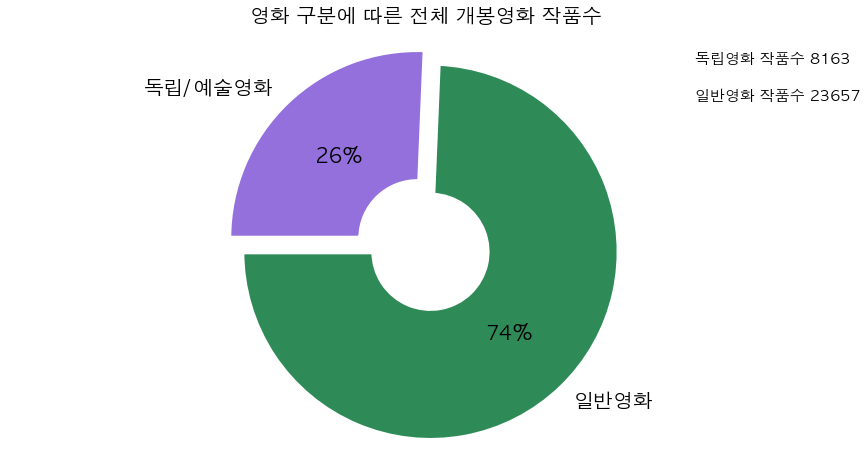

In [7]:
ratio = df['영화구분'].value_counts()
labels = df['영화구분'].value_counts().index
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}
colors = ['seagreen','mediumpurple']
explode = [0, 0.10]

plt.figure(figsize=(15,8))

plt.pie(ratio, labels=labels, autopct='%.0f%%', startangle=180, counterclock=True,
       wedgeprops=wedgeprops, colors=colors, textprops={'fontsize': 20}, explode = explode)

plt.text(1.4, 1, f"독립영화 작품수 {df['영화구분'].value_counts().values[1]}", fontsize=15)
plt.text(1.4, 0.8, f"일반영화 작품수 {df['영화구분'].value_counts().values[0]}", fontsize=15)

plt.axis('equal')
plt.title('영화 구분에 따른 전체 개봉영화 작품수', fontsize=20)
plt.savefig("./images/작품수(영화구분).png", facecolor='#ffffff')
plt.show()

### 2) 월별 전체 영화 구분에 따른 개봉작품수 

> ## 2018년도 이후 독립영화에 지속적인 감소세
> ### 절반으로 뚝 떨어진 독립영화 관객... 한국영화의 '위기'(오마이뉴스_2019.02)
> - 스크린 독과점 심화
> - 전체적으로 수익률 추락 (고예산 영화 중 손익분기점 넘긴 영화 드묾)

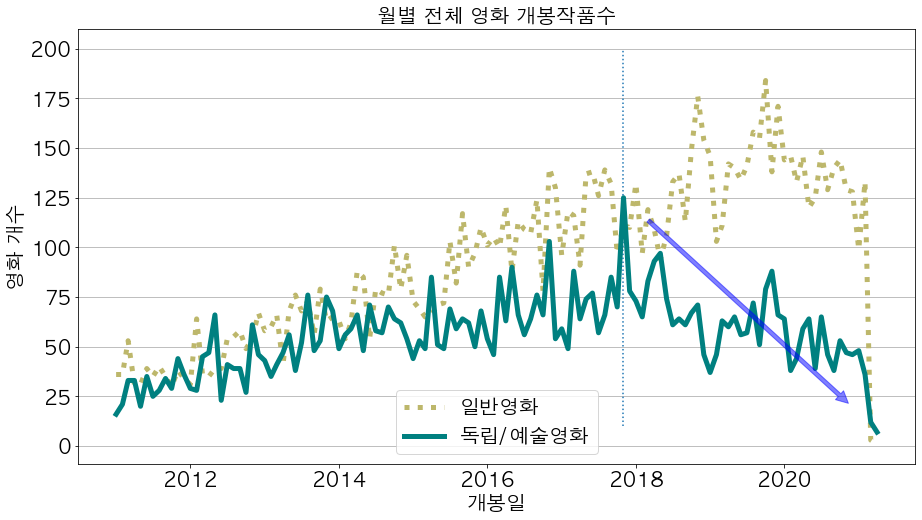

In [8]:
# 개봉일 정보 없는 데이터들은 drop
df_open = df[df["개봉일"] != "정보없음"]

# 개봉일에 따른 영화 갯수 파악을 위한 전처리 작업 
df_open["개봉일"] = df_open["개봉일"].str.split("-").str[0] + df_open["개봉일"].str.split("-").str[1]
df_open["개봉일"] = df_open["개봉일"].astype(int)
df_open = df_open[df_open["개봉일"] >= 201101]

# 데이트 타임으로 형 변환 후 그래프화 작업
df_open["개봉일"] = pd.to_datetime(df_open["개봉일"], format="%Y%m")
df_open1 = df_open[df_open["영화구분"] == "일반영화"]
df_open2 = df_open[df_open["영화구분"] != "일반영화"]


# 연도별 전체 영화 개봉작품 수
plt.figure(figsize=(15,8))
plt.rc('font',size=20)

plt.plot(df_open1.groupby(df_open1["개봉일"]).size(),color = 'darkkhaki', linewidth=5, linestyle=':', label='일반영화')
plt.plot(df_open2.groupby(df_open2["개봉일"]).size(),color ='teal', linewidth=5, label='독립/예술영화')

plt.legend(loc=8) 
plt.grid(True, axis='y')
plt.title("월별 전체 영화 개봉작품수", fontsize=20)
plt.xlabel('개봉일')
plt.ylabel('영화 개수')
plt.vlines([17470], 10,200, linestyle = ':')
plt.annotate("", xy=(18700,10),xytext=(17470,125),arrowprops={
    'facecolor':'b', "edgecolor":'b','shrink' : 0.1, 'alpha':0.5 })
plt.savefig("./images/개봉작품수(영화구분).png", facecolor='#ffffff')
plt.show()

### 3)  전체 영화 등급 분포

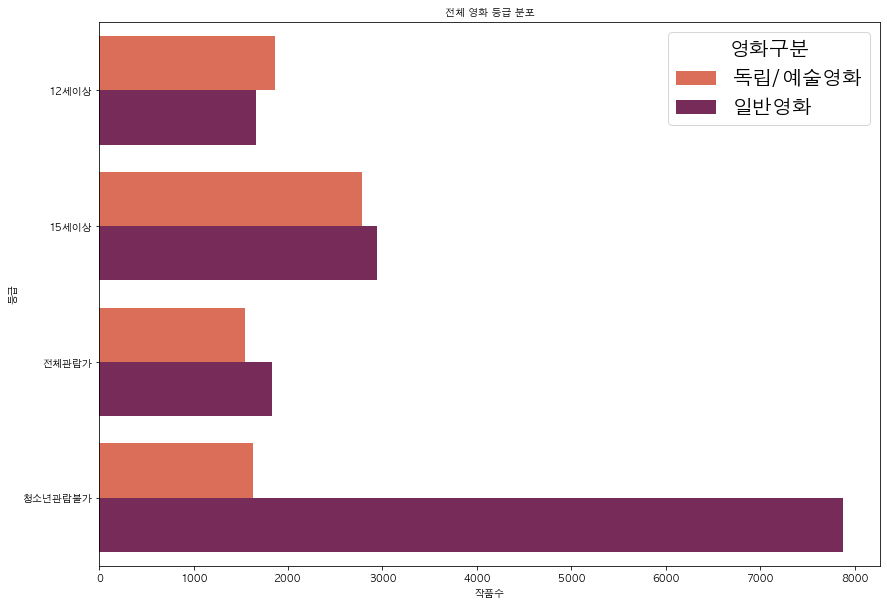

In [9]:
datas_grade_1 = indiefilm[['등급']].groupby('등급').size().reset_index(name="작품수")
datas_grade_1 = datas_grade_1[datas_grade_1["등급"] != "정보없음"]

datas_grade_2 = film[['등급']].groupby('등급').size().reset_index(name="작품수")
datas_grade_2 = datas_grade_2[datas_grade_2["등급"] != "정보없음"]

datas_grade_1["영화구분"] = "독립/예술영화"
datas_grade_2["영화구분"] = "일반영화"
datas = pd.concat([datas_grade_1, datas_grade_2], 0)

# 독립/예술영화, 일반영화 등급 분포 그래프
plt.figure(figsize=(14,10))
parameters = {'axes.labelsize': 10,
              'axes.titlesize': 10,
              "xtick.labelsize":10,
              "ytick.labelsize":10}

plt.rcParams.update(parameters)
sns.barplot(x = datas['작품수'], y = datas['등급'], hue = datas["영화구분"], palette="rocket_r")
plt.title('전체 영화 등급 분포')
plt.savefig("./images/등급분포(영화구분).png", facecolor='#ffffff')
plt.show()

### 3 - 1) 전체 영화 장르 분포

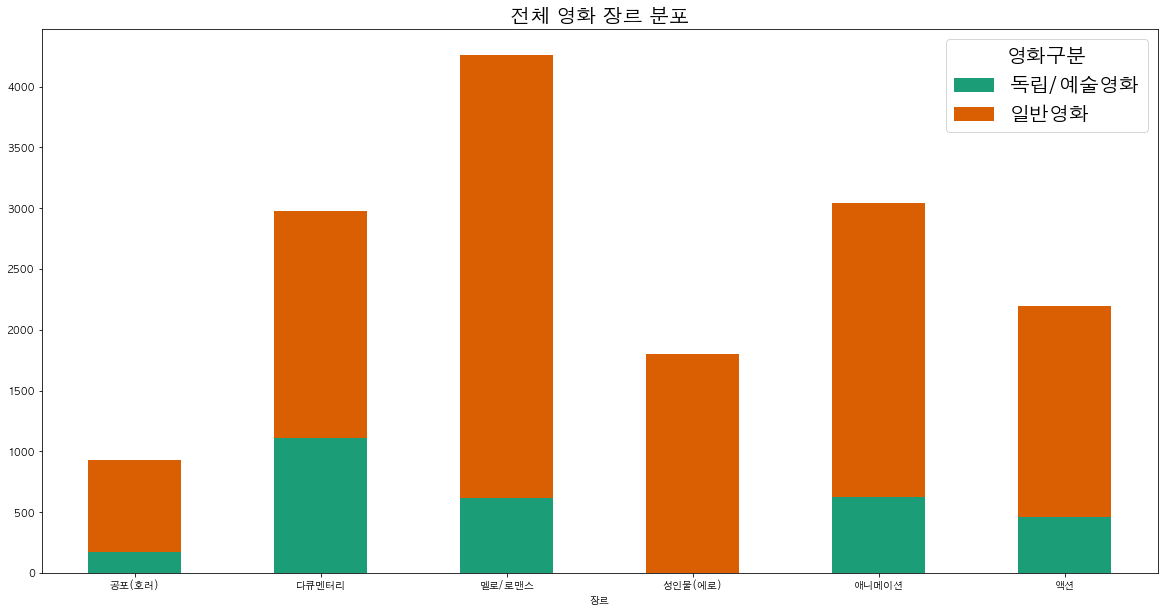

In [10]:
# 독립/예술영화, 일반영화 장르 분포 그래프
datas_genre_1 = indiefilm[['장르']].groupby('장르').size().reset_index(name="count")
datas_genre_2 = film[['장르']].groupby('장르').size().reset_index(name="count")

datas_genre_1["영화구분"] = "독립/예술영화"
datas_genre_2["영화구분"] = "일반영화"
datas_genre = pd.concat([datas_genre_1, datas_genre_2], 0)

interest = ["멜로/로맨스", "다큐멘터리", "애니메이션", "액션", "공포(호러)", "성인물(에로)"]
datas_interest = datas_genre[datas_genre["장르"].isin(interest)]
datas_interest_pivot = datas_interest.pivot(index='장르', columns='영화구분', values='count')

sns.set_palette(sns.color_palette('Dark2'))
datas_interest_pivot.plot.bar(stacked=True, rot=0, figsize=(20,10))
plt.title('전체 영화 장르 분포', fontsize=20)
plt.savefig("./images/장르분포.png", facecolor='#ffffff')
plt.show();

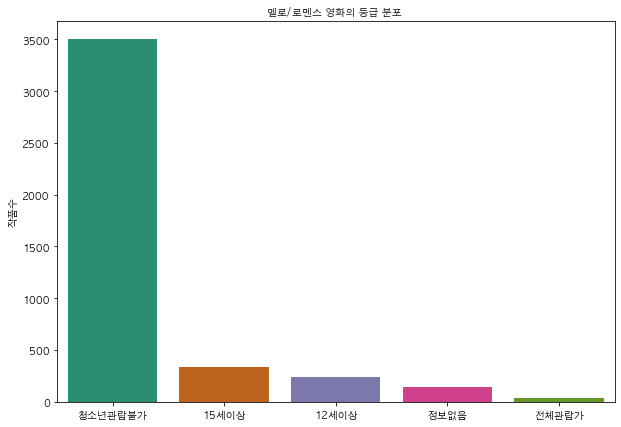

In [11]:
romance = df[df["장르"] == "멜로/로맨스"]
romance1 = romance["등급"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(romance1.index, romance1.values)
plt.title("멜로/로멘스 영화의 등급 분포 ")
plt.ylabel("작품수")
plt.savefig("./images/멜로,로멘스영화-등급분포.png", facecolor='#ffffff')
plt.show()

### 3 - 2) 전체 영화 장르와 등급의 매출액 상관관계

In [12]:
# 전국매출액 상위랭크 100위까지
is_audience_top = df.sort_values(by = ['전국매출액'], ascending=False)
audience_top = is_audience_top[:100]

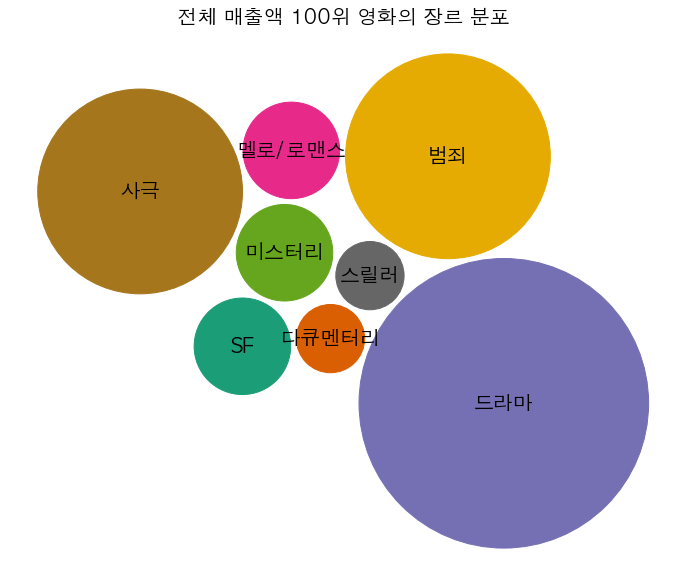

In [13]:
# 장르 분포
audience_top_genre = audience_top[['장르']].groupby('장르').size().reset_index(name="전국매출액")

color = sns.color_palette('Dark2')
bubble_chart = BubbleChart(area=audience_top_genre['전국매출액'][:8],
                           bubble_spacing=0.1)

bubble_chart.collapse()



fig, ax = plt.subplots(figsize=(15,10),subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, audience_top_genre['장르'][:8], color)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('전체 매출액 100위 영화의 장르 분포',  fontsize = 20)

plt.savefig("./images/top100(장르분포).png", facecolor='#ffffff')
plt.show()

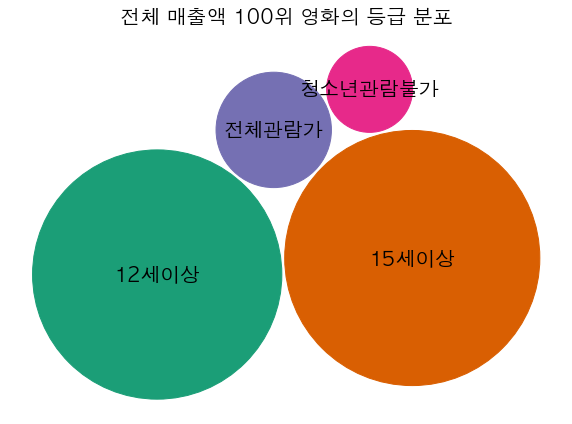

In [14]:
# 등급 분포
audience_top_grade = audience_top[['등급']].groupby('등급').size().reset_index(name='매출액') 

color = sns.color_palette('Dark2')
bubble_chart = BubbleChart(area=audience_top_grade['매출액'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(figsize=(10,8),subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, audience_top_grade['등급'], color)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('전체 매출액 100위 영화의 등급 분포',  fontsize = 20)

plt.savefig("./images/top100(등급분포).png", facecolor='#ffffff')
plt.show()

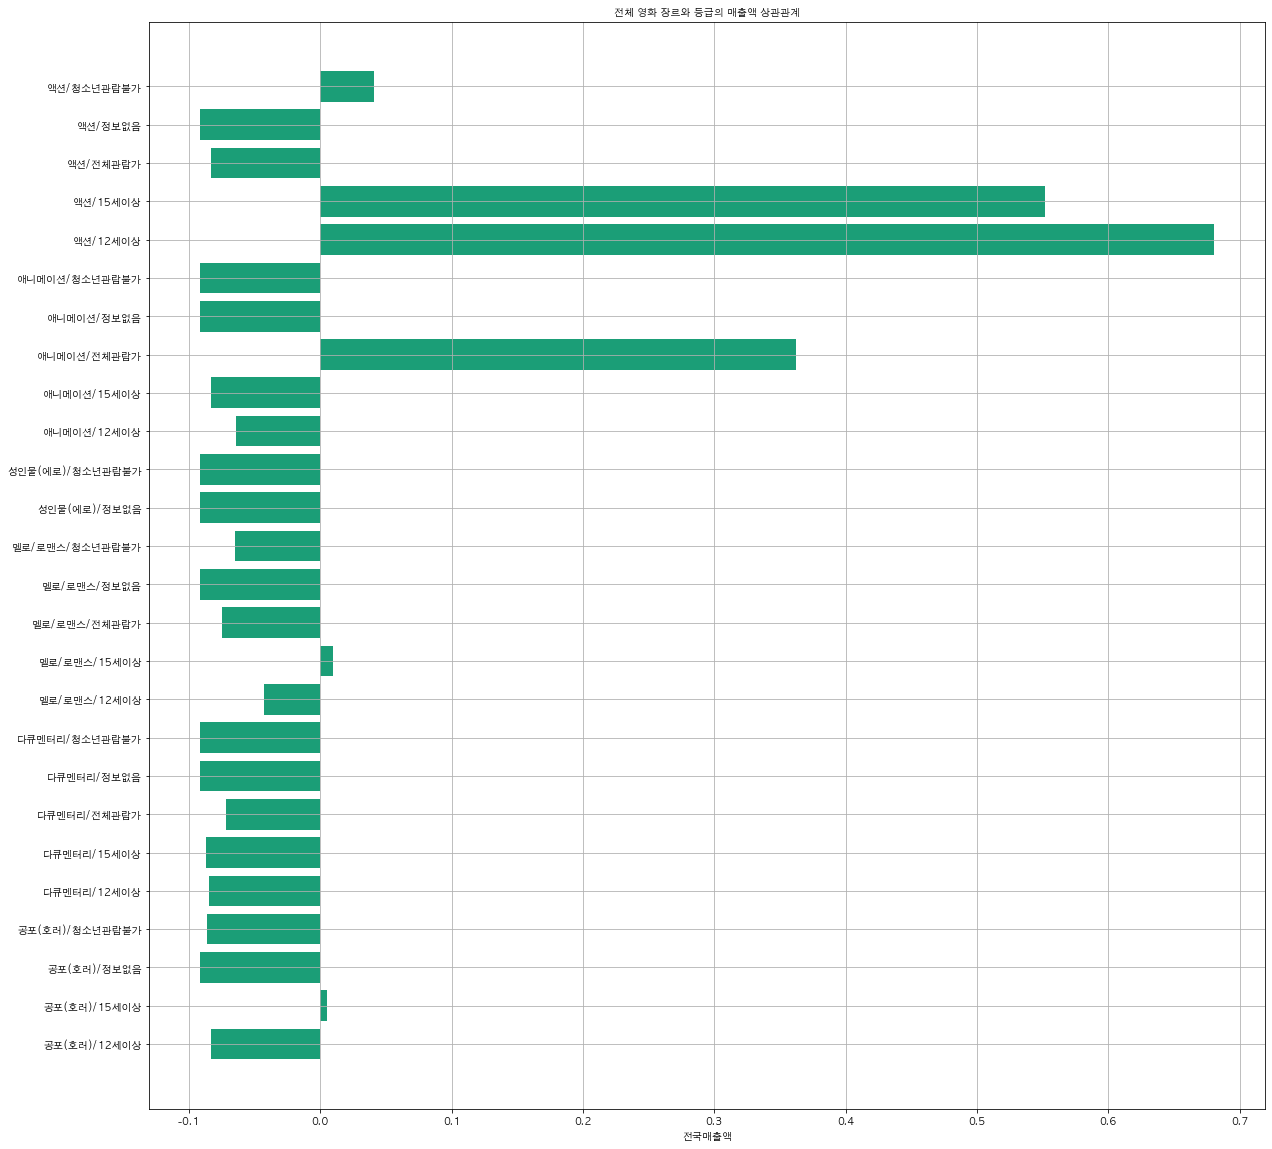

In [15]:
df_number = df[["전국매출액","전국스크린수","전국관객수","서울매출액","서울관객수"]]
list_a = ["공포(호러)", "다큐멘터리", "멜로/로맨스", "성인물(에로)", "애니메이션", "액션"]

df1 = df[df["장르"].isin(list_a)]
c = df1.groupby(["장르","등급"]).sum().reset_index()
c["원하는거"] = c["장르"] + "/" + c["등급"]
a = pd.get_dummies(c["원하는거"] )
c = pd.concat([a, c["전국매출액"]],1)

# 장르와 등급의 매출액 상관관계
data = c.corr()["전국매출액"]

plt.figure(figsize = (20,20))
plt.grid("on")
plt.title("전체 영화 장르와 등급의 매출액 상관관계")
plt.xlabel("전국매출액")
plt.barh(data.index[:-1], data.values[:-1])

plt.savefig("./images/장르-매출액(상관관계).png", facecolor='#ffffff')
plt.show()

### 4) 전체 영화 지역별 관객수 분포

In [16]:
import plotly.express as px

fig = px.box(df, y=["서울관객수","전국관객수"], color="영화구분", title='전체 영화 지역별 관객수 분포',
            labels={"variable": "지역",
                     "value": "관객수"})

fig.write_image("./images/관객수-분포(지역).png", facecolor='#ffffff')
fig.show()

TypeError: write_image() got an unexpected keyword argument 'facecolor'

- 데이터 자체가 일정 기간의 전체 개봉 영화를 집계한 것이기 때문에 값이 극단적이라서 평균이나 중간값을 가지기 어렵다.

---
<img src ="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVsztd%2Fbtq2yoSypS7%2FbCJncpKxHUGb338IFupNI1%2Fimg.png" height="700px" width="700px" align="left" >


> - (자료)한국 독립영화 예술영화 영화관 지도 0.8 

### 4 - 1) 전체 영화 지역별 상위 매출액 10개의 영화 비교 분석

> ### 서울 사람들이 지방 사람들보다 외국영화를 더 좋아한다고?(경향신문_2013.10) 
> - 전문가들은 이 같이 지역별로 편차가 있는 이유는 관객의 성향이라기보다 
> - 지방에는 스크린 수 등 영화관 인프라가 부족해 관객들이 다양한 영화를 접할 수 있는 
> - 선택권이 제한됐기 때문이라고 분석했다.

In [ ]:
# 독립/예술영화 서울 매출액
indiefilm["서울매출액"] = indiefilm["서울매출액"].replace("정보없음",0)
a = indiefilm.sort_values(by = ["서울매출액"], axis =0, ascending=False)["영화명"].reset_index(drop = "순번")

# 독립/예술영화 전국 매출액
indiefilm["전국매출액"] = indiefilm["전국매출액"].replace("정보없음",0)
b = indiefilm.sort_values(by = ["전국매출액"], axis =0, ascending=False)["영화명"].reset_index(drop = "순번")

indi_rank = pd.concat([a,b], 1)
indi_rank.columns = ["서울 매출액(독립)", "전국 매출액(독립)"]
indi_rank[:5]

In [ ]:
# 일반영화 서울 매출액
film["서울매출액"] = film["서울매출액"].replace("정보없음",0)
a = film.sort_values(by = ["서울매출액"], axis =0, ascending=False)["영화명"].reset_index(drop = "순번")

# 일반영화 전국 매출액
film["전국매출액"] = film["전국매출액"].replace("정보없음",0)
b = film.sort_values(by = ["전국매출액"], axis =0, ascending=False)["영화명"].reset_index(drop = "순번")

indi_rank = pd.concat([a,b], 1)
indi_rank.columns = ["서울 매출액(일반)", "전국 매출액(일반)"]
indi_rank[:5]

### 5) 가장 많은 영화를 개봉한 감독

In [ ]:
df_director = df[['감독', '영화명', "전국매출액", "전국스크린수","전국관객수","서울매출액","서울관객수"]]
df_director[['감독']].value_counts()[:10]

In [ ]:
df.groupby('감독').get_group('강정훈').head(2)

In [ ]:
df.groupby('감독').get_group('나가에 타카미').head(2)

In [ ]:
# 정보없음 값 확인
director_nan = df[df['감독'] == '정보없음']
director_nan.head(3)

### 5 - 1) 스크린수가 1개인 영화 탐색

In [ ]:
# 스크린수 1개인 영화 파악
screen = df[df['전국스크린수'] == 1]

In [ ]:
# 스크린수 1개인 영화의 국적 분포
country = screen['국적'].value_counts().index
country_ratio = screen['국적'].value_counts()

b_list = []
for i in range(len(country)):
    b = country_ratio[i] / country_ratio.sum() * 100
    b_list.append(round(b,2))

rosechart = pd.DataFrame({'국적' : country, '비율' : b_list })

c = rosechart['국적'][:10].values.tolist()
d = rosechart['비율'][:10].values.tolist()

#create the color_series for the rosechart
color_series = ['#802200', '#B33000', '#FF4500', '#FAA327', '#9ECB3C', 
                '#6DBC49', '#37B44E', '#14ADCF', '#209AC9', '#1E91CA']
rosechart = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))

# set the color
rosechart.set_colors(color_series)

# add the data to the rosechart
rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["20%", "95%"],  # 20% inside radius，95% ourside radius
        center=["30%", "60%"],   # center of the chart
        rosetype="area")

# set the global options for the chart
rosechart.set_global_opts(title_opts=opts.TitleOpts(title='스크린수 1개인 영화의 국적 분포'),
                          legend_opts=opts.LegendOpts(is_show=False),
                          toolbox_opts=opts.ToolboxOpts())

# set the series options
rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,formatter="{b}:{c}%", font_style="italic",font_weight="bold", font_family="Century"),)
rosechart.render_notebook()

In [ ]:
# 스크린수 1개인 영화의 장르 분포
ratio_genre = screen['장르'].value_counts()
genre_name = screen['장르'].value_counts().index

bb_list = []
for i in range(len(genre_name)):
    bb = ratio_genre[i] / ratio_genre.sum() * 100
    bb_list.append(round(bb,2))

rosechart = pd.DataFrame({'장르' : genre_name, '비율' : bb_list })

c = rosechart['장르'][:10].values.tolist()
d = rosechart['비율'][:10].values.tolist()

#create the color_series for the rosechart
color_series = ['#802200', '#B33000', '#FF4500', '#FAA327', '#9ECB3C', 
                '#6DBC49', '#37B44E', '#14ADCF', '#209AC9', '#1E91CA']
rosechart = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))

# set the color
rosechart.set_colors(color_series)

# add the data to the rosechart
rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["20%", "95%"],  # 20% inside radius，95% ourside radius
        center=["30%", "60%"],   # center of the chart
        rosetype="area")

# set the global options for the chart
rosechart.set_global_opts(title_opts=opts.TitleOpts(title='스크린수 1개 영화의 장르 분포'),
                          legend_opts=opts.LegendOpts(is_show=False),
                          toolbox_opts=opts.ToolboxOpts())

# set the series options
rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,formatter="{b}:{c}%", font_style="italic",font_weight="bold", font_family="Century"),)
rosechart.render_notebook()

### 6) 독립/예술 영화 추가 탐색
    - 독립/예술영화 영화명 워드클라우드 분석

In [ ]:
# indie_worldcloud 생성
# 원본 데이터를 국내 독립 영화만 기준으로 필터링
indie_worldcloud = indiefilm[indiefilm["국적"] == "한국"]
film_worldcloud = film[film["국적"] == "한국"]
ColumnNanInfo(indie_worldcloud, "제작사", 3)

In [ ]:
mask = np.array(Image.open('./data/mask-cloud.png'))
image_colors = ImageColorGenerator(mask)

# 제작사 열에 정보없음값이 없는 행 제거 후 영화명에 가장 많이 사용된 20개의 단어 추출
plt.rc('font', size =12)
Rank_data = WordCount(indie_worldcloud, "제작사")

In [ ]:
wc = wordcloud = WordCloud(
    font_path= path,
    relative_scaling = 0.5, mask=mask,
    background_color='white',
    colormap = 'winter'
         ).generate_from_frequencies(dict(Rank_data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("./images/wordcloud.png", facecolor='#ffffff')
plt.show()

---

# 결론
## 1. 결과
1. 독립/예술 영화 배급사는 일반 영화에 비해 현저하게 적으며 이러한 문제때문에 일반 영화가 4개의 작품이 개봉할 때 독립/예술 영화는 1개의 작품만 개봉된 다는 것을 알 수 있다.
2.	2018년부터 독립/예술 영화의 지속적인 감소세가 보이고 있었으며 2019년에는 예년 수준으로 잠시 회복했으나 2020년 코로나로 인하여 다시 또 하락하고 있다.
3.	전체 개봉 영화 중에는 청소년 관람불가 작품이 많고 장르적으로는 독립/예술 영화는 다큐멘터리, 일반 영화는 멜로/로맨스 작품이 가장 많은 분포를 가지고 있다. 특이하게 일반영화에서는 성인물 작품 수가 많다. 
4.	매출액이 높은 영화의 장르는 드라마, 범죄, 사극 순으로 많이 분포하였고 12세와 15세이상 관람가 작품이 많았다. 그러나 장르와 등급의 상관관계에서는 액션과 15세이상 관람가, 액션과 12세이상 관람가, 애니메이션과 전체관람가가 가장 유의미하게 상관이 있다는 결과가 나왔다. 
5.	독립/예술 영화의 서울 관객수와 전국 관객수는 크게 차이가 나지 않는데 이것은 독립영화관이 주로 서울에 집중이 되어 있어서 그렇다. 매출액 기준으로 전국과 서울 지역의 독립/예술 영화 상위 5위권 영화는 차이가 거의 없는데 일반 영화에서는 유독 서울 지역에서 외국 영화가 상위에 랭크 되어 있다는 것을 알 수 있다. 이것 또한 지방은 영화관 인프라가 부족해서 다양한 영화를 접할 수 없기 때문이다.
6.	유독 멜로/로맨스 작품에 청소년 관람불가 작품이 많았던 이유는 실제적으로는 성인물(에로) 작품이 멜로/로맨스 장르로 구분되어 있기 때문이었다. 이런 영화들은 주로 스크린수가 1개로 잡혀있는데 이것을 “형식 개봉 영화” 라고 하고 한국과 일본 국적을 가진 영화가 가장 많았다. 
7.	영화 제목은 관객이 마주하는 첫 요소로 영화에 대한 흥미를 불러일으키는 가장 직접적인 요소중 하나이다. 이런 영화 제목은 관객의 감성을 자극해 영화에 호소력을 더하는 호소적 기능과 함께 언어의 수사적 기교를 통해서 관객의 심금을 울리는 심미적 기능이 있다고 알려져 있습니다.* 워드 클라우드의 결과는 국내 독립/예술 영화는 관객들에게 감성적으로 어필을 하고 있다는 것을 알 수 있습니다.

## 2. 추후 개선 및 느낀점

## 3. 참고

- <영화 제목으로 본 영한 번역기법 연구: 영화 산업 정책과 언어 정책의 변화를 중심으로> 권유진, 2020